In [117]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
# from kneed import KneeLocator

# data modeling
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

#warnings
import warnings
warnings.simplefilter(action='ignore')

In [118]:
# Try using 'ISO-8859-1' encoding
df = pd.read_csv('online_retail_cleaned.csv', encoding='ISO-8859-1')



In [119]:
data=df.copy()

In [120]:
data.shape

(537966, 9)

In [121]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,15.3
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,15.3
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,163.2
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,81.6


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537966 entries, 0 to 537965
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    537966 non-null  object 
 1   StockCode    537966 non-null  object 
 2   Description  537966 non-null  object 
 3   Quantity     537966 non-null  int64  
 4   InvoiceDate  537966 non-null  object 
 5   UnitPrice    537966 non-null  float64
 6   CustomerID   405542 non-null  float64
 7   Country      537966 non-null  object 
 8   ItemTotal    537966 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 36.9+ MB


In [123]:
data.describe()

,Quantity,UnitPrice,CustomerID,ItemTotal
count,537966.000000,537966.000000,405542.000000,537966.000000
mean,9.866505,4.006620,15294.913449,18.461239
std,40.741227,30.957236,1710.289816,74.552311
min,-9360.000000,0.001000,12347.000000,-8322.120000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.840000
75%,10.000000,4.130000,16794.000000,17.400000
max,4800.000000,6930.000000,18287.000000,7144.720000


In [124]:
data.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,537966,537966,537966,537966,537966
unique,23539,3930,3787,21590,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2307,2374,1114,492668


## Analysis

In [96]:
United_Kingdom_country=data[data['Country']=='United Kingdom']
United_Kingdom_country_Quantity=United_Kingdom_country[United_Kingdom_country['Quantity']<=0]
United_Kingdom_country_Quantity 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
75,C537602,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-07-12 12:45:00,2.55,17511.0,United Kingdom,-2.55
131,C538350,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-10-12 15:01:00,2.55,13798.0,United Kingdom,-2.55
166,C538834,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-14 13:06:00,2.95,14415.0,United Kingdom,-2.95
200,C539329,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-500,2010-12-17 09:37:00,2.55,16013.0,United Kingdom,-1275.00
228,C539832,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-22 13:20:00,2.55,17239.0,United Kingdom,-2.55
...,...,...,...,...,...,...,...,...,...
536493,C576868,23581,JUMBO BAG PAISLEY PARK,-1,2011-11-16 16:19:00,2.08,18263.0,United Kingdom,-2.08
536630,C580968,23581,JUMBO BAG PAISLEY PARK,-20,2011-06-12 14:57:00,2.08,15622.0,United Kingdom,-41.60
536724,C574473,23497,CLASSIC CHROME BICYCLE BELL,-12,2011-04-11 12:05:00,1.45,15809.0,United Kingdom,-17.40
537359,C579783,23597,PAPER BUNTING PAISLEY PARK,-6,2011-11-30 15:21:00,2.95,17727.0,United Kingdom,-17.70


## drop dublicate

In [83]:
duplicated_rows = data[data.duplicated()]
print(duplicated_rows)

data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)

       InvoiceNo StockCode                         Description  Quantity  \
304       540953    85123A  WHITE HANGING HEART T-LIGHT HOLDER         1   
348       541660    85123A  WHITE HANGING HEART T-LIGHT HOLDER         3   
380       542239    85123A  WHITE HANGING HEART T-LIGHT HOLDER         2   
1397      560385    85123A  WHITE HANGING HEART T-LIGHT HOLDER         1   
1406      560555    85123A  WHITE HANGING HEART T-LIGHT HOLDER         1   
...          ...       ...                                 ...       ...   
537747    581237     23498               CLASSIC BICYCLE CLIPS         1   
537779    579145     23580             SNACK TRAY HAPPY FOREST         1   
537858    581134     23560      SET OF 6 RIBBONS COUNTRY STYLE         1   
537906    579387     23562   SET OF 6 RIBBONS PERFECTLY PRETTY         1   
537936    581134     23562   SET OF 6 RIBBONS PERFECTLY PRETTY         1   

                InvoiceDate  UnitPrice  CustomerID         Country  ItemTotal  
304    

### analysis on Description

In [151]:
best_descriptions = data[data['Description'].str.contains('best ', case=False, na=False)]
best_descriptions


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
285030,536544,21354,TOAST ITS - BEST MUM,1,2010-01-12 14:32:00,2.51,NaN,United Kingdom,2.51
285031,536576,21354,TOAST ITS - BEST MUM,12,2010-01-12 16:11:00,1.05,13777.0,United Kingdom,12.60
285032,536617,21354,TOAST ITS - BEST MUM,12,2010-02-12 10:17:00,1.25,13941.0,United Kingdom,15.00
285033,536796,21354,TOAST ITS - BEST MUM,1,2010-02-12 15:46:00,1.25,15574.0,United Kingdom,1.25
285034,537077,21354,TOAST ITS - BEST MUM,3,2010-05-12 11:59:00,1.25,17062.0,United Kingdom,3.75
...,...,...,...,...,...,...,...,...,...
444146,553014,72140E,BEST DAD CANDLE LETTERS,6,2011-12-05 18:49:00,0.85,13451.0,United Kingdom,5.10
444147,554202,72140E,BEST DAD CANDLE LETTERS,3,2011-05-23 12:14:00,0.85,13546.0,United Kingdom,2.55
444148,555931,72140E,BEST DAD CANDLE LETTERS,6,2011-08-06 08:31:00,0.85,17828.0,Malta,5.10
444149,570230,72140E,BEST DAD CANDLE LETTERS,1,2011-09-10 13:41:00,0.85,18088.0,United Kingdom,0.85


In [150]:
bad_descriptions = data[data['Description'].str.contains('bad ', case=False, na=False)]
bad_descriptions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
449705,546625,16161G,WRAP BAD HAIR DAY,25,2011-03-15 11:45:00,0.1,17542.0,United Kingdom,2.5
449706,548806,16161G,WRAP BAD HAIR DAY,25,2011-04-04 12:52:00,0.1,13098.0,United Kingdom,2.5
449707,552468,16161G,WRAP BAD HAIR DAY,25,2011-09-05 15:33:00,0.1,13141.0,United Kingdom,2.5
449708,554000,16161G,WRAP BAD HAIR DAY,25,2011-05-20 11:53:00,0.1,14794.0,United Kingdom,2.5
449709,554985,16161G,WRAP BAD HAIR DAY,25,2011-05-29 12:26:00,0.1,12426.0,Germany,2.5
449710,557322,16161G,WRAP BAD HAIR DAY,25,2011-06-20 09:04:00,0.1,17444.0,Canada,2.5
449711,559155,16161G,WRAP BAD HAIR DAY,25,2011-06-07 15:49:00,0.1,13418.0,United Kingdom,2.5
449712,560828,16161G,WRAP BAD HAIR DAY,50,2011-07-21 11:55:00,0.1,14298.0,United Kingdom,5.0
449713,561322,16161G,WRAP BAD HAIR DAY,50,2011-07-26 13:03:00,0.1,15203.0,United Kingdom,5.0
449714,561642,16161G,WRAP BAD HAIR DAY,25,2011-07-28 15:04:00,0.1,17965.0,United Kingdom,2.5


In [154]:
bad_descriptions = data[data['Description'].str.contains('BADGES', case=False, na=False)]
bad_descriptions # most of them ,CustomerID=nan

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
306430,536592,21220,SET/4 BADGES DOGS,1,2010-01-12 17:06:00,2.51,NaN,United Kingdom,2.51
306431,536876,21220,SET/4 BADGES DOGS,1,2010-03-12 11:36:00,2.51,NaN,United Kingdom,2.51
306432,537237,21220,SET/4 BADGES DOGS,2,2010-06-12 09:58:00,2.51,NaN,United Kingdom,5.02
306433,538349,21220,SET/4 BADGES DOGS,3,2010-10-12 14:59:00,2.51,NaN,United Kingdom,7.53
306434,538566,21220,SET/4 BADGES DOGS,1,2010-12-13 11:21:00,2.51,NaN,United Kingdom,2.51
...,...,...,...,...,...,...,...,...,...
523494,574561,23613,SET 10 XMAS CARDS & BADGES 17070,1,2011-04-11 15:52:00,2.49,NaN,United Kingdom,2.49
523495,576617,23613,SET 10 XMAS CARDS & BADGES 17070,1,2011-11-15 16:57:00,2.49,NaN,United Kingdom,2.49
523496,576618,23613,SET 10 XMAS CARDS & BADGES 17070,1,2011-11-15 17:00:00,2.49,NaN,United Kingdom,2.49
523497,577078,23613,SET 10 XMAS CARDS & BADGES 17070,2,2011-11-17 15:17:00,2.49,NaN,United Kingdom,4.98


### on InvoiceNo
C indicate canceld

In [32]:
rows_with_C = df[df['InvoiceNo'].str.startswith('C', na=False)]
rows_with_C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
75,C537602,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-07-12 12:45:00,2.55,17511.0,United Kingdom,-2.55
131,C538350,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-10-12 15:01:00,2.55,13798.0,United Kingdom,-2.55
166,C538834,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-14 13:06:00,2.95,14415.0,United Kingdom,-2.95
200,C539329,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-500,2010-12-17 09:37:00,2.55,16013.0,United Kingdom,-1275.00
216,C539576,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-24,2010-12-20 12:25:00,2.95,14911.0,EIRE,-70.80
...,...,...,...,...,...,...,...,...,...
536493,C576868,23581,JUMBO BAG PAISLEY PARK,-1,2011-11-16 16:19:00,2.08,18263.0,United Kingdom,-2.08
536630,C580968,23581,JUMBO BAG PAISLEY PARK,-20,2011-06-12 14:57:00,2.08,15622.0,United Kingdom,-41.60
536724,C574473,23497,CLASSIC CHROME BICYCLE BELL,-12,2011-04-11 12:05:00,1.45,15809.0,United Kingdom,-17.40
537359,C579783,23597,PAPER BUNTING PAISLEY PARK,-6,2011-11-30 15:21:00,2.95,17727.0,United Kingdom,-17.70


In [136]:
rows_with_C['Country'].value_counts()

Country
United Kingdom        7630
Germany                444
EIRE                   301
France                 138
USA                    112
Australia               73
Spain                   48
Italy                   44
Japan                   37
Belgium                 36
Switzerland             33
Portugal                18
Norway                  14
Malta                   14
Poland                  11
Channel Islands         10
Sweden                   9
Cyprus                   8
Denmark                  8
Singapore                7
Finland                  6
Netherlands              6
Hong Kong                4
Czech Republic           4
Austria                  3
Israel                   2
European Community       1
Saudi Arabia             1
Bahrain                  1
Name: count, dtype: int64

In [165]:
data['Type'] = data['InvoiceNo'].apply(lambda x: 0 if x.startswith('C') else 1)


In [166]:
data['Country'].value_counts()

Country
United Kingdom          487494
Germany                   9095
France                    8228
EIRE                      8178
Spain                     2465
Netherlands               2328
Belgium                   1971
Switzerland               1960
Portugal                  1480
Australia                 1253
Norway                    1065
Italy                      785
Channel Islands            757
Finland                    654
Cyprus                     610
Unspecified                442
Sweden                     437
Austria                    387
Denmark                    375
Japan                      358
Poland                     336
Israel                     294
USA                        291
Hong Kong                  282
Singapore                  229
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57


In [167]:
rows_without_C = df[~df['InvoiceNo'].str.startswith('C', na=False)]
rows_without_C['Country'].value_counts()

Country
United Kingdom          485038
Germany                   8666
France                    8106
EIRE                      7889
Spain                     2422
Netherlands               2322
Belgium                   1935
Switzerland               1935
Portugal                  1471
Australia                 1181
Norway                    1051
Channel Islands            748
Italy                      741
Finland                    648
Cyprus                     613
Unspecified                446
Sweden                     429
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     295
Hong Kong                  282
Singapore                  222
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57


In [168]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.groupby(['Country'])[['TotalPrice']].mean().sort_values(by='TotalPrice',ascending=False).head(10)

,TotalPrice
Country,
Netherlands,121.635541
Australia,109.275738
Japan,98.716816
Sweden,80.540984
Denmark,48.112373
Lithuania,47.458857
Singapore,39.827031
Lebanon,37.641778
Brazil,35.737500


In [169]:
data.groupby(['Country'])[['TotalPrice']].sum().sort_values(by='TotalPrice',ascending=False).head(10)

,TotalPrice
Country,
United Kingdom,8417984.183
Netherlands,283167.540
EIRE,262993.380
Germany,200688.470
France,182244.610
Australia,136922.500
Switzerland,52483.050
Spain,48904.030
Belgium,36662.960


In [170]:
data.groupby(['Country'])[['TotalPrice']].sum().sort_values(by='TotalPrice',ascending=False).head(10)

,TotalPrice
Country,
United Kingdom,8417984.183
Netherlands,283167.540
EIRE,262993.380
Germany,200688.470
France,182244.610
Australia,136922.500
Switzerland,52483.050
Spain,48904.030
Belgium,36662.960


In [171]:
data.groupby(['Country'])[['Quantity']].mean().sort_values(by='Quantity',ascending=False).head(10)

,Quantity
Country,
Netherlands,85.675687
Sweden,81.453089
Japan,70.441341
Australia,66.508380
Singapore,22.855895
Denmark,21.725333
Czech Republic,21.142857
Lithuania,18.628571
Canada,18.413333


- United Kingdom is higher count but also had higher canceld
- Switzerland is higher mean TotalPrice

## show distribution

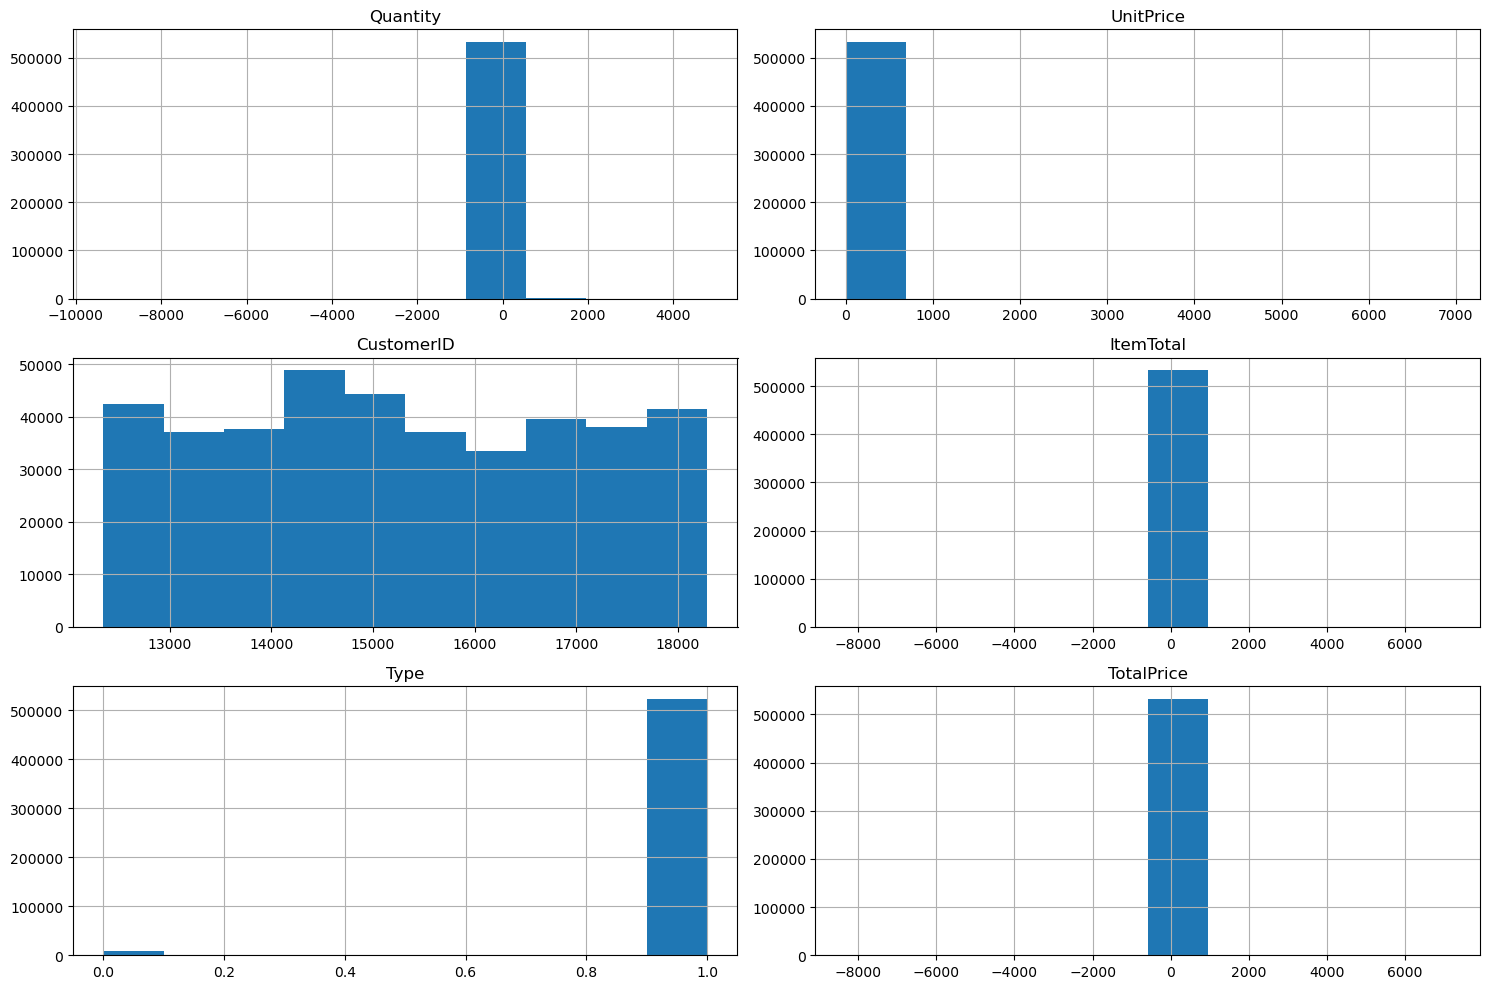

In [172]:
data.hist(figsize=(15,10))
plt.tight_layout()

As the Quantity  increase, the itemtotal ,total price also increases hence a linear relationship

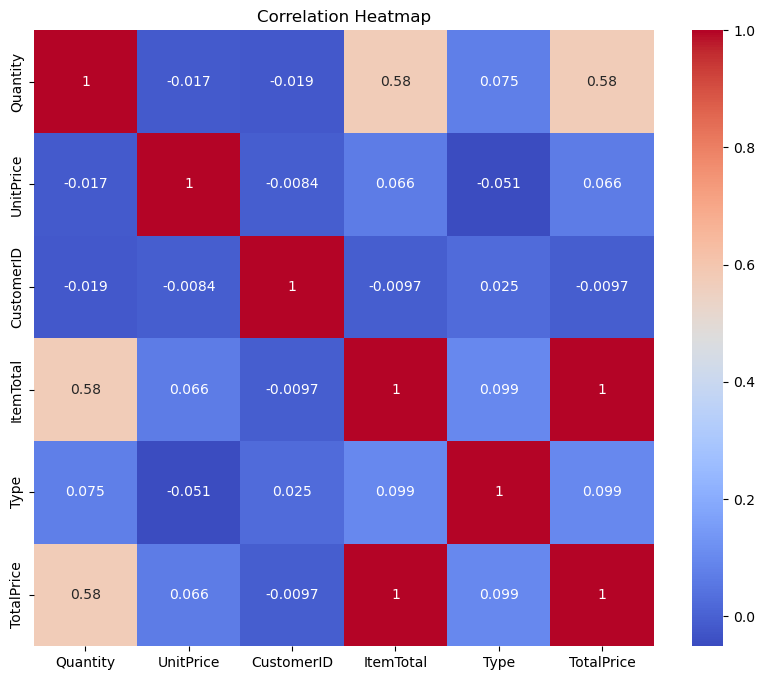

In [173]:
numeric_df = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [174]:
data.drop(columns = ['CustomerID','InvoiceDate','StockCode','Description','InvoiceNo'],inplace=True)

In [175]:
data.columns

Index(['Quantity', 'UnitPrice', 'Country', 'ItemTotal', 'Type', 'TotalPrice'], dtype='object')

In [125]:
country_coordinates = {
    'United Kingdom': (55.3781, -3.4360),
    'Spain': (40.4637, -3.7492),
    'Cyprus': (35.1264, 33.4299),
    'EIRE': (53.4129, -8.2439),  # Note: EIRE is an old name for Ireland
    'Portugal': (39.3999, -8.2245),
    'Netherlands': (52.3676, 4.9041),
    'Australia': (-25.2744, 133.7751),
    'Singapore': (1.3521, 103.8198),
    'Switzerland': (46.8182, 8.2275),
    'Finland': (61.9241, 25.7482),
    'Channel Islands': (49.3713, -2.3596),
    'France': (46.6034, 1.8883),
    'Malta': (35.9375, 14.3754),
    'Italy': (41.8719, 12.5674),
    'Israel': (31.0461, 34.8516),
    'Germany': (51.1657, 10.4515),
    'Austria': (47.5162, 14.5501),
    'Norway': (60.4720, 8.4689),
    'Denmark': (56.2639, 9.5018),
    'Unspecified': (None, None),
    'Sweden': (60.1282, 18.6435),
    'Belgium': (50.8503, 4.3517),
    'Canada': (56.1304, -106.3468),
    'Poland': (51.9194, 19.1451),
    'Japan': (36.2048, 138.2529),
    'Iceland': (64.9631, -19.0208),
    'Greece': (39.0742, 21.8243),
    'Hong Kong': (22.3964, 114.1095),
    'Lebanon': (33.8547, 35.8623),
    'European Community': (54.5260, 15.2551),
    'RSA': (-30.5595, 22.9375),  # Republic of South Africa
    'Czech Republic': (49.8175, 15.4730),
    'USA': (37.0902, -95.7129),
    'Brazil': (-14.2350, -51.9253),
    'United Arab Emirates': (23.4241, 53.8478),
    'Lithuania': (55.1694, 23.8813),
    'Saudi Arabia': (23.8859, 45.0792),
    'Bahrain': (25.9304, 50.6378),
}

In [126]:
data['Latitude'], data['Longitude'] = zip(*data['Country'].map(country_coordinates))

In [127]:
data = data.drop('Country', axis=1)

In [128]:
data = data.drop('InvoiceDate', axis=1)


In [129]:
data = data.drop('CustomerID', axis=1)

In [130]:
# Drop rows where all specified columns are NaN
data=data.dropna(subset=['Latitude', 'Longitude'])


In [131]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
ItemTotal      0
Latitude       0
Longitude      0
dtype: int64

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537520 entries, 0 to 537965
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    537520 non-null  object 
 1   StockCode    537520 non-null  object 
 2   Description  537520 non-null  object 
 3   Quantity     537520 non-null  int64  
 4   UnitPrice    537520 non-null  float64
 5   ItemTotal    537520 non-null  float64
 6   Latitude     537520 non-null  float64
 7   Longitude    537520 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 36.9+ MB


In [133]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['InvoiceNo', 'StockCode', 'Description']

# Apply label encoding using a for loop
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


In [134]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,ItemTotal,Latitude,Longitude
0,0,3419,3618,6,2.55,15.30,55.3781,-3.436
1,8,3419,3618,6,2.55,15.30,55.3781,-3.436
2,10,3419,3618,6,2.55,15.30,55.3781,-3.436
3,23,3419,3618,64,2.55,163.20,55.3781,-3.436
4,26,3419,3618,32,2.55,81.60,55.3781,-3.436
5,28,3419,3618,6,2.55,15.30,55.3781,-3.436
6,33,3419,3618,4,2.95,11.80,55.3781,-3.436
7,38,3419,3618,8,2.55,20.40,55.3781,-3.436
8,57,3419,3618,6,2.95,17.70,55.3781,-3.436
9,60,3419,3618,3,2.95,8.85,55.3781,-3.436


In [135]:
scaler = StandardScaler()
data['Quantity'] = scaler.fit_transform(data[['Quantity']])
data['UnitPrice'] = scaler.fit_transform(data[['UnitPrice']])
data['ItemTotal'] = scaler.fit_transform(data[['ItemTotal']])



In [108]:
features=data.columns

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components =1)

In [111]:
data = pca.fit_transform(data)

In [112]:
pca.explained_variance_ratio_

array([0.94967328])

In [113]:
features=data.select_dtypes(include=['number'])

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [114]:
loadings = pd.DataFrame(pca.components_, columns=features)

<Axes: >

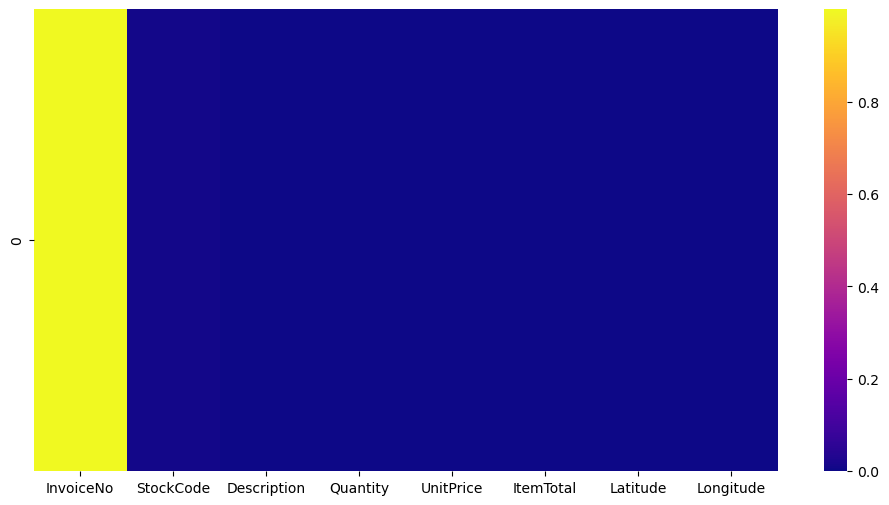

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(loadings,cmap='plasma')

In [136]:
X=data[['Quantity', 'UnitPrice', 'ItemTotal', 'Latitude', 'Longitude']]

In [137]:
from sklearn.cluster import KMeans

In [138]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [139]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [140]:
kmeans.cluster_centers_

array([[-1.96119952e-02, -1.94308134e-03, -1.46933148e-02,
         5.53390966e+01, -3.60450555e+00],
       [ 1.12553751e+00,  4.99565509e-01,  9.58872136e-01,
        -5.65010715e+00,  1.28659410e+02],
       [ 3.45587211e-01, -2.18824179e-02,  2.53976996e-01,
         5.04221363e+01,  1.20218586e+01],
       [ 6.07507294e-02,  2.16512409e-02,  3.53516890e-02,
         4.51542637e+01,  3.29400506e-02]])

In [141]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [142]:
customer_clustered = data.copy()

In [143]:
customer_clustered['Clusters'] = y_kmeans
customer_clustered

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,ItemTotal,Latitude,Longitude,Clusters
0,0,3419,3618,-0.094917,-0.047068,-0.042473,55.3781,-3.436,0
1,8,3419,3618,-0.094917,-0.047068,-0.042473,55.3781,-3.436,0
2,10,3419,3618,-0.094917,-0.047068,-0.042473,55.3781,-3.436,0
3,23,3419,3618,1.328143,-0.047068,1.940571,55.3781,-3.436,0
4,26,3419,3618,0.543006,-0.047068,0.846478,55.3781,-3.436,0
...,...,...,...,...,...,...,...,...,...
537961,18778,2420,2878,-0.217594,-0.035444,-0.208598,55.3781,-3.436,0
537962,18826,3482,1430,-0.217594,-0.049974,-0.214632,55.3781,-3.436,0
537963,18921,2428,2880,-0.193059,-0.035444,-0.169581,55.3781,-3.436,0
537964,19438,3907,1835,0.052296,-0.120042,-0.200955,55.3781,-3.436,0


In [144]:
customer_clustered['Clusters'].value_counts()

Clusters
0    501481
2     18891
3     15021
1      2127
Name: count, dtype: int64

In [145]:
describe_clusters = customer_clustered.groupby(customer_clustered['Clusters']).mean()
describe_clusters

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,ItemTotal,Latitude,Longitude
Clusters,,,,,,,,
0,10441.653058,1610.119502,1953.100516,-0.019612,-0.001943,-0.014693,55.339097,-3.604506
1,8842.612130,1527.452280,2023.052186,1.125538,0.499566,0.958872,-5.650107,128.659410
2,10586.320311,1502.895029,2007.409931,0.345587,-0.021882,0.253977,50.422136,12.021859
3,10644.453698,1475.036016,2024.397244,0.060751,0.021651,0.035352,45.154264,0.032940


In [146]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'ItemTotal', 'Latitude', 'Longitude'],
      dtype='object')

In [147]:
features = ['Quantity', 'UnitPrice', 'ItemTotal']

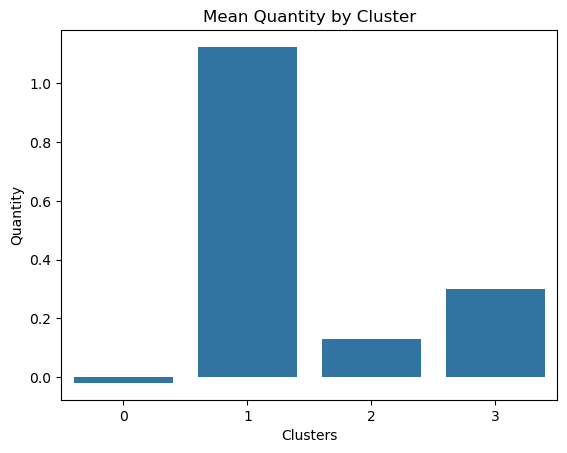

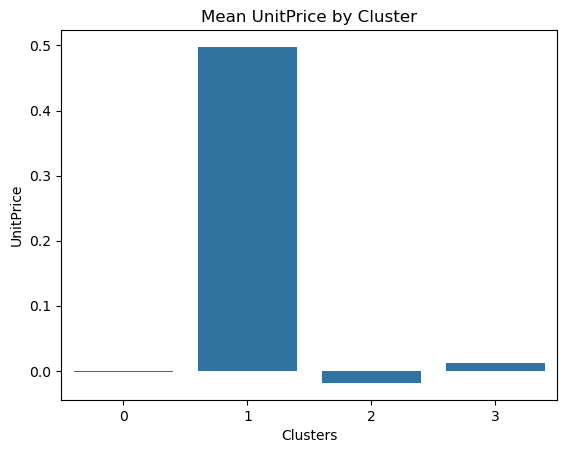

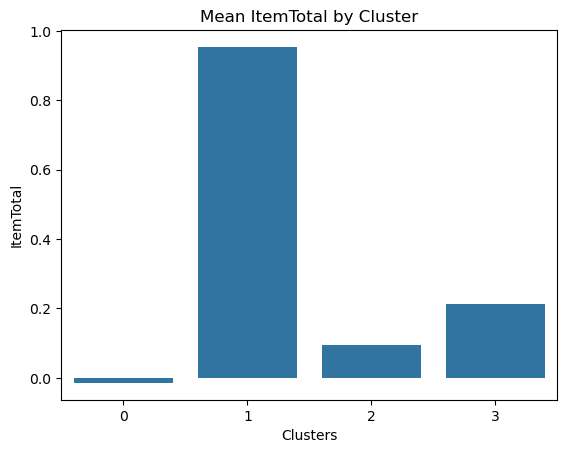

In [195]:
for i in features:
    
    sns.barplot(x = describe_clusters.index
               , y = i
               , data = describe_clusters)
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.show()

In [196]:
describe_clusters

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude
Clusters,,,,,,,
0,-0.019666,-0.001923,-0.014664,0.983864,17.510017,55.338737,-3.606150
1,1.123543,0.497744,0.954047,0.942978,90.064444,-5.693727,128.684426
2,0.131328,-0.018622,0.093501,0.963510,25.611390,50.162246,13.009057
3,0.300588,0.011887,0.214125,0.985275,34.645826,46.126690,0.691561


Text(38.44844500303367, 0.5, 'ItemTotal')

<Figure size 1000x600 with 0 Axes>

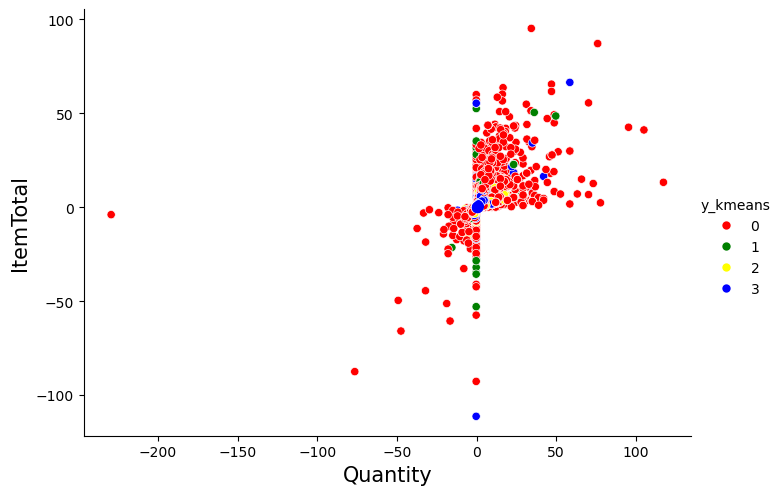

In [197]:

# Assuming 'kmeans.labels_' is the array with cluster labels
customer_clustered['y_kmeans'] = kmeans.labels_  # Add cluster labels to the dataframe

# Plotting
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10,6))
sns.relplot(data = customer_clustered ,x='Quantity', y='ItemTotal', hue="y_kmeans", palette=['red','green','yellow','blue'] ,kind='scatter', aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='blue', s=50)
plt.xlabel("Quantity",fontsize=15)
plt.ylabel("ItemTotal",fontsize=15)

In [198]:
cluster_0=customer_clustered[customer_clustered['Clusters']== 0]
cluster_0

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
0,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
1,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
2,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
3,1.323261,-0.047344,1.930518,1,163.20,55.3781,-3.436,0,0
4,0.539986,-0.047344,0.841034,1,81.60,55.3781,-3.436,0,0
...,...,...,...,...,...,...,...,...,...
532697,-0.218811,-0.035776,-0.209597,1,2.91,55.3781,-3.436,0,0
532698,-0.218811,-0.050236,-0.215605,1,2.46,55.3781,-3.436,0,0
532699,-0.194333,-0.035776,-0.170744,1,5.82,55.3781,-3.436,0,0
532700,0.050440,-0.119963,-0.201986,1,3.48,55.3781,-3.436,0,0


In [199]:
cluster_0[cluster_0['Quantity'] <= 0]

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
0,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
1,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
2,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
5,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
6,-0.145379,-0.034491,-0.090902,1,11.80,55.3781,-3.436,0,0
...,...,...,...,...,...,...,...,...,...
532696,-0.096424,-0.036419,-0.016934,1,17.34,55.3781,-3.436,0,0
532697,-0.218811,-0.035776,-0.209597,1,2.91,55.3781,-3.436,0,0
532698,-0.218811,-0.050236,-0.215605,1,2.46,55.3781,-3.436,0,0
532699,-0.194333,-0.035776,-0.170744,1,5.82,55.3781,-3.436,0,0


In [200]:
cluster_0[cluster_0['UnitPrice'] <= 0]

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
0,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
1,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
2,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
3,1.323261,-0.047344,1.930518,1,163.20,55.3781,-3.436,0,0
4,0.539986,-0.047344,0.841034,1,81.60,55.3781,-3.436,0,0
...,...,...,...,...,...,...,...,...,...
532696,-0.096424,-0.036419,-0.016934,1,17.34,55.3781,-3.436,0,0
532697,-0.218811,-0.035776,-0.209597,1,2.91,55.3781,-3.436,0,0
532698,-0.218811,-0.050236,-0.215605,1,2.46,55.3781,-3.436,0,0
532699,-0.194333,-0.035776,-0.170744,1,5.82,55.3781,-3.436,0,0


In [201]:
cluster_0[cluster_0['ItemTotal'] <= 0]

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
0,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
1,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
2,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
5,-0.096424,-0.047344,-0.044171,1,15.30,55.3781,-3.436,0,0
6,-0.145379,-0.034491,-0.090902,1,11.80,55.3781,-3.436,0,0
...,...,...,...,...,...,...,...,...,...
532697,-0.218811,-0.035776,-0.209597,1,2.91,55.3781,-3.436,0,0
532698,-0.218811,-0.050236,-0.215605,1,2.46,55.3781,-3.436,0,0
532699,-0.194333,-0.035776,-0.170744,1,5.82,55.3781,-3.436,0,0
532700,0.050440,-0.119963,-0.201986,1,3.48,55.3781,-3.436,0,0


In [202]:
cluster_1=customer_clustered[customer_clustered['Clusters']== 1]
cluster_1

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
345,-0.096424,-0.034491,-0.012128,1,17.70,-25.2744,133.7751,1,1
368,0.197304,-0.034491,0.460516,1,53.10,1.3521,103.8198,1,1
1390,0.539986,-0.047344,0.841034,1,81.60,1.3521,103.8198,1,1
3107,-0.047469,-0.008785,0.152096,1,30.00,-25.2744,133.7751,1,1
7655,0.148349,-0.008785,0.552642,1,60.00,36.2048,138.2529,1,1
...,...,...,...,...,...,...,...,...,...
527065,0.637896,-0.023566,1.332904,1,118.44,-25.2744,133.7751,1,1
528649,0.931624,-0.023566,1.860022,1,157.92,-25.2744,133.7751,1,1
528663,2.106535,-0.023566,3.968494,1,315.84,36.2048,138.2529,1,1
528751,-0.610448,-0.023566,-0.907347,0,-49.35,36.2048,138.2529,1,1


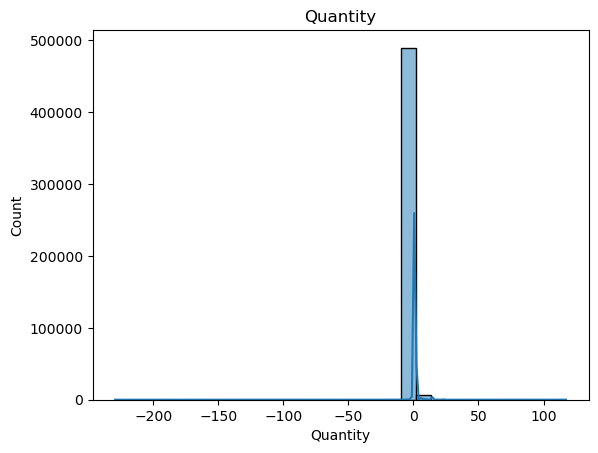

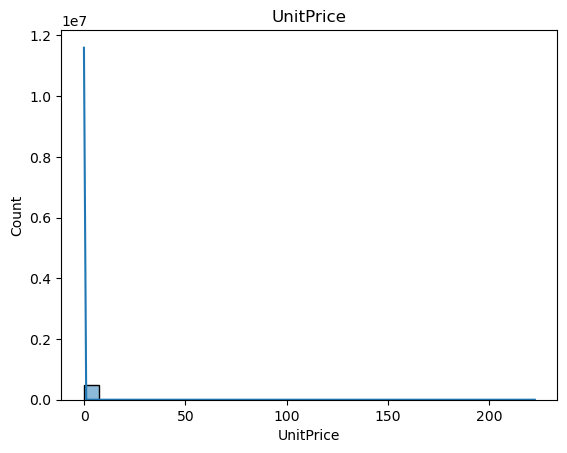

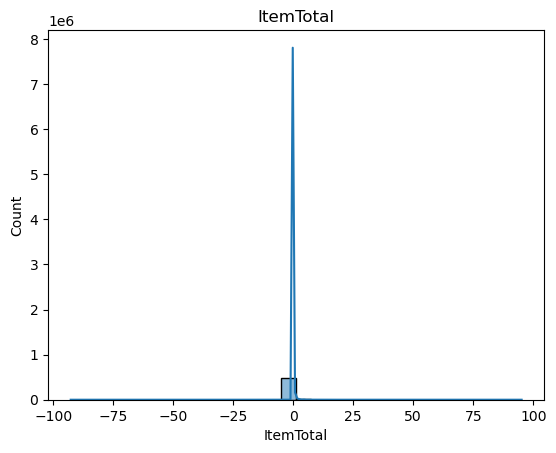

In [203]:
for i in features:
    
    sns.histplot(cluster_0[i], bins=30, kde=True)
    plt.title( str(i) )
    plt.show()

most of unit price and item total below the zero in cluster zero

In [204]:
cluster_1=customer_clustered[customer_clustered['Clusters']== 1]
cluster_1

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
345,-0.096424,-0.034491,-0.012128,1,17.70,-25.2744,133.7751,1,1
368,0.197304,-0.034491,0.460516,1,53.10,1.3521,103.8198,1,1
1390,0.539986,-0.047344,0.841034,1,81.60,1.3521,103.8198,1,1
3107,-0.047469,-0.008785,0.152096,1,30.00,-25.2744,133.7751,1,1
7655,0.148349,-0.008785,0.552642,1,60.00,36.2048,138.2529,1,1
...,...,...,...,...,...,...,...,...,...
527065,0.637896,-0.023566,1.332904,1,118.44,-25.2744,133.7751,1,1
528649,0.931624,-0.023566,1.860022,1,157.92,-25.2744,133.7751,1,1
528663,2.106535,-0.023566,3.968494,1,315.84,36.2048,138.2529,1,1
528751,-0.610448,-0.023566,-0.907347,0,-49.35,36.2048,138.2529,1,1


In [205]:
cluster_1[cluster_1['Quantity'] < 0]

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
345,-0.096424,-0.034491,-0.012128,1,17.70,-25.2744,133.7751,1,1
3107,-0.047469,-0.008785,0.152096,1,30.00,-25.2744,133.7751,1,1
8129,-0.096424,-0.076263,-0.116270,1,9.90,-25.2744,133.7751,1,1
8137,-0.096424,-0.076263,-0.116270,1,9.90,-25.2744,133.7751,1,1
8784,-0.096424,0.254699,0.708854,1,71.70,22.3964,114.1095,1,1
...,...,...,...,...,...,...,...,...,...
519742,-0.047469,0.004068,0.194821,1,33.20,-25.2744,133.7751,1,1
524890,-0.145379,0.061906,0.069317,1,23.80,1.3521,103.8198,1,1
525827,-0.096424,0.110104,0.348363,1,44.70,-25.2744,133.7751,1,1
525983,-0.194333,0.135810,-0.028150,1,16.50,1.3521,103.8198,1,1


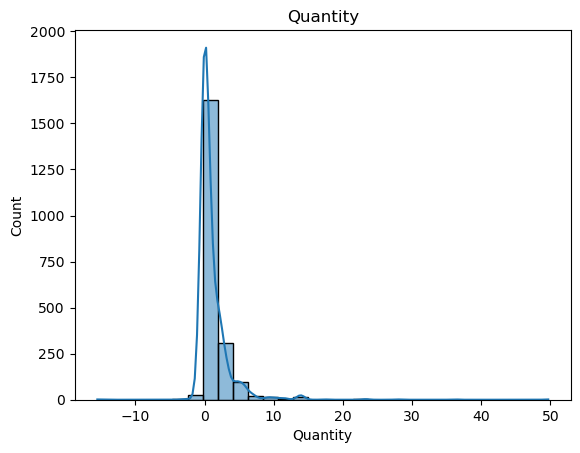

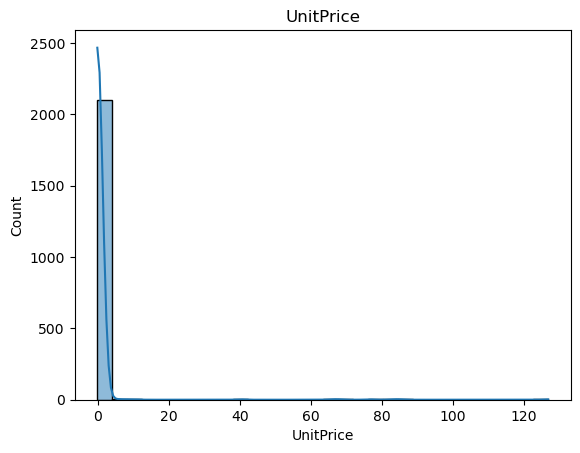

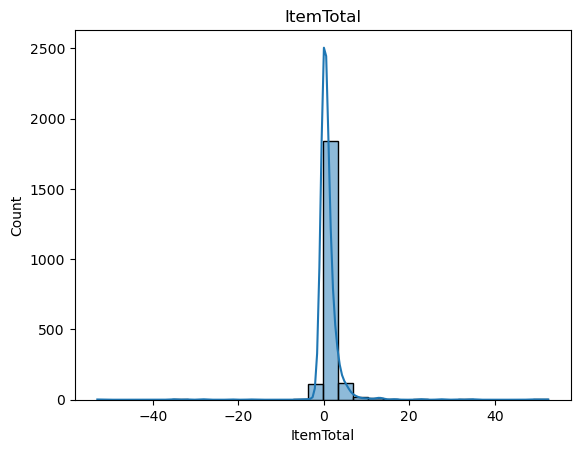

In [206]:
for i in features:
    
    sns.histplot(cluster_1[i], bins=30, kde=True)
    plt.title( str(i) )
    plt.show()

most of unit price and item total above  the zero in cluster one

In [207]:
cluster_2=customer_clustered[customer_clustered['Clusters']== 2]
cluster_2

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
163,1.323261,-0.047344,1.930518,1,163.20,35.1264,33.4299,2,2
458,-0.047469,-0.034491,0.066646,1,23.60,35.1264,33.4299,2,2
491,0.539986,-0.047344,0.841034,1,81.60,35.1264,33.4299,2,2
541,0.637896,-0.047344,0.977220,1,91.80,46.8182,8.2275,2,2
561,-0.096424,-0.034491,-0.012128,1,17.70,61.9241,25.7482,2,2
...,...,...,...,...,...,...,...,...,...
532599,0.050440,-0.036419,0.214581,1,34.68,51.1657,10.4515,2,2
532602,-0.047469,-0.066623,-0.040166,1,15.60,51.1657,10.4515,2,2
532629,-0.047469,-0.066623,-0.040166,1,15.60,51.1657,10.4515,2,2
532677,0.050440,-0.036419,0.214581,1,34.68,51.1657,10.4515,2,2


In [208]:
cluster_2[cluster_2['Quantity'] < 0]

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
458,-0.047469,-0.034491,0.066646,1,23.60,35.1264,33.4299,2,2
561,-0.096424,-0.034491,-0.012128,1,17.70,61.9241,25.7482,2,2
1205,-0.096424,-0.034491,-0.012128,1,17.70,35.9375,14.3754,2,2
1503,-0.096424,-0.034491,-0.012128,1,17.70,41.8719,12.5674,2,2
1815,-0.218811,-0.034491,-0.209063,1,2.95,31.0461,34.8516,2,2
...,...,...,...,...,...,...,...,...,...
532539,-0.047469,-0.066623,-0.040166,1,15.60,51.1657,10.4515,2,2
532578,-0.096424,-0.036419,-0.016934,1,17.34,51.1657,10.4515,2,2
532588,-0.096424,-0.036419,-0.016934,1,17.34,61.9241,25.7482,2,2
532602,-0.047469,-0.066623,-0.040166,1,15.60,51.1657,10.4515,2,2


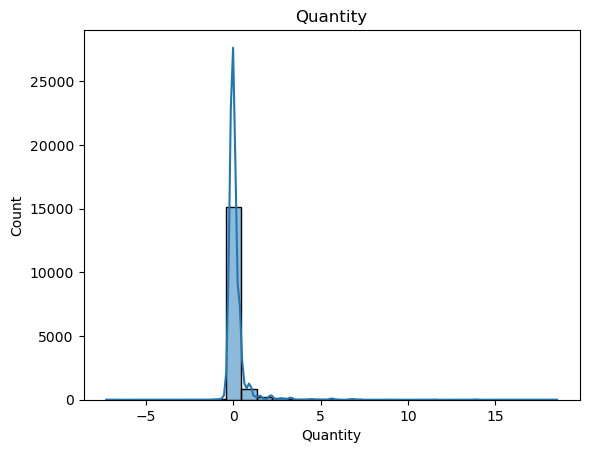

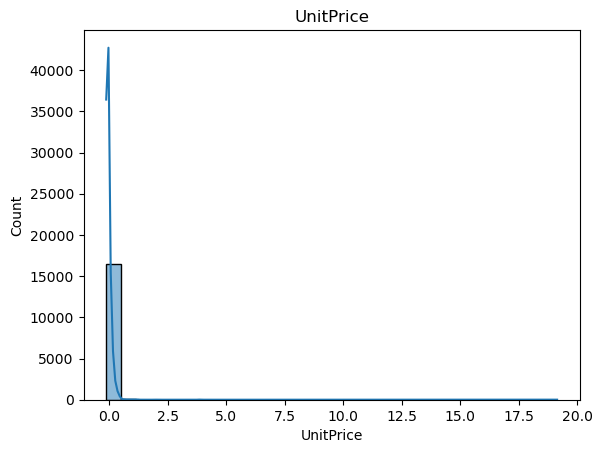

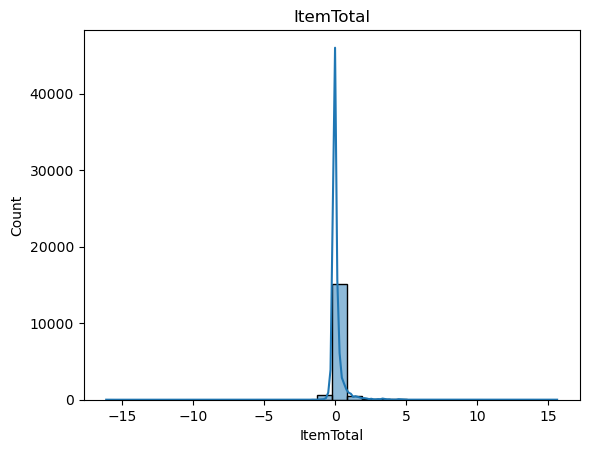

In [209]:
for i in features:
    
    sns.histplot(cluster_2[i], bins=30, kde=True)
    plt.title( str(i) )
    plt.show()

In [210]:
cluster_3=customer_clustered[customer_clustered['Clusters']== 3]
cluster_3

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
114,-0.218811,-0.034491,-0.209063,1,2.95,40.4637,-3.7492,3,3
201,-0.096424,-0.034491,-0.012128,1,17.70,39.3999,-8.2245,3,3
271,-0.096424,-0.034491,-0.012128,1,17.70,40.4637,-3.7492,3,3
342,6.022907,-0.047344,8.467422,1,652.80,52.3676,4.9041,3,3
470,-0.096424,-0.034491,-0.012128,1,17.70,40.4637,-3.7492,3,3
...,...,...,...,...,...,...,...,...,...
532623,-0.047469,-0.066623,-0.040166,1,15.60,50.8503,4.3517,3,3
532667,-0.096424,-0.036419,-0.016934,1,17.34,50.8503,4.3517,3,3
532670,-0.096424,-0.036419,-0.016934,1,17.34,46.6034,1.8883,3,3
532673,1.225351,-0.049272,1.746267,1,149.40,52.3676,4.9041,3,3


In [211]:
cluster_3[cluster_3['Quantity'] <=0] 

,Quantity,UnitPrice,ItemTotal,Type,TotalPrice,Latitude,Longitude,Clusters,y_kmeans
114,-0.218811,-0.034491,-0.209063,1,2.95,40.4637,-3.7492,3,3
201,-0.096424,-0.034491,-0.012128,1,17.70,39.3999,-8.2245,3,3
271,-0.096424,-0.034491,-0.012128,1,17.70,40.4637,-3.7492,3,3
470,-0.096424,-0.034491,-0.012128,1,17.70,40.4637,-3.7492,3,3
920,-0.022992,-0.034491,0.106033,1,26.55,46.6034,1.8883,3,3
...,...,...,...,...,...,...,...,...,...
532545,-0.047469,-0.066623,-0.040166,1,15.60,46.6034,1.8883,3,3
532605,-0.047469,-0.066623,-0.040166,1,15.60,46.6034,1.8883,3,3
532623,-0.047469,-0.066623,-0.040166,1,15.60,50.8503,4.3517,3,3
532667,-0.096424,-0.036419,-0.016934,1,17.34,50.8503,4.3517,3,3


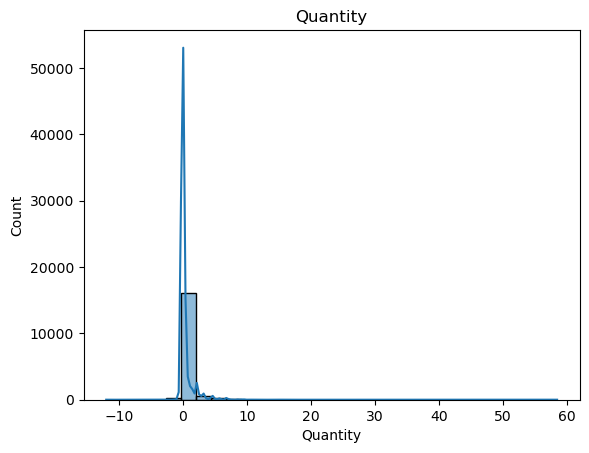

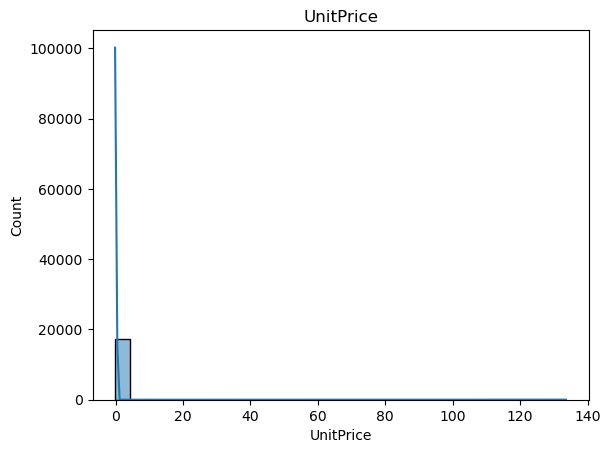

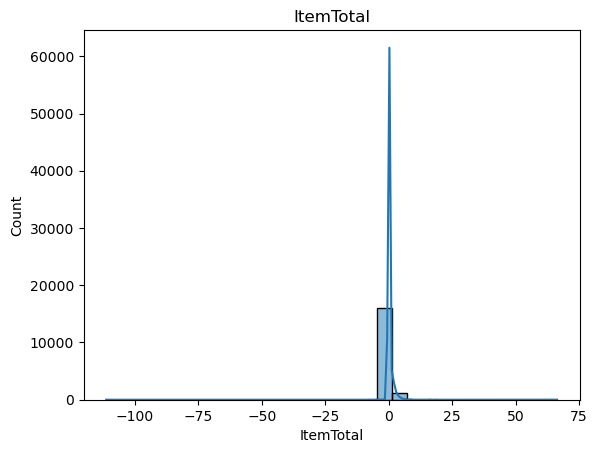

In [212]:
for i in features:
    
    sns.histplot(cluster_3[i], bins=30, kde=True)
    plt.title( str(i) )
    plt.show()

In [362]:
customer_clustered

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,ItemTotal,Latitude,Longitude,Clusters
0,0,3419,3618,-0.094917,-0.047068,-0.042473,55.3781,-3.436,0
1,8,3419,3618,-0.094917,-0.047068,-0.042473,55.3781,-3.436,0
2,10,3419,3618,-0.094917,-0.047068,-0.042473,55.3781,-3.436,0
3,23,3419,3618,1.328143,-0.047068,1.940571,55.3781,-3.436,0
4,26,3419,3618,0.543006,-0.047068,0.846478,55.3781,-3.436,0
...,...,...,...,...,...,...,...,...,...
537961,18778,2420,2878,-0.217594,-0.035444,-0.208598,55.3781,-3.436,0
537962,18826,3482,1430,-0.217594,-0.049974,-0.214632,55.3781,-3.436,0
537963,18921,2428,2880,-0.193059,-0.035444,-0.169581,55.3781,-3.436,0
537964,19438,3907,1835,0.052296,-0.120042,-0.200955,55.3781,-3.436,0


In [363]:
customer_clustered[['Clusters']].value_counts()

Clusters
0           501481
2            18891
3            15021
1             2127
Name: count, dtype: int64

In [364]:
customer_clustered_copy=customer_clustered.copy()

In [365]:
customer_clustered.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,ItemTotal,Latitude,Longitude,Clusters
count,537520.000000,537520.000000,537520.000000,5.375200e+05,5.375200e+05,5.375200e+05,537520.000000,537520.000000,537520.000000
mean,10446.077112,1602.249098,1957.278397,-1.853291e-17,2.025137e-17,-2.263077e-17,54.640338,-2.430296,0.158082
std,6041.814380,900.382014,1062.219403,1.000001e+00,1.000001e+00,1.000001e+00,4.827109,9.365190,0.609140
min,0.000000,0.000000,0.000000,-2.298945e+02,-1.293741e-01,-1.118306e+02,-30.559500,-106.346800,0.000000
25%,5021.000000,933.000000,1083.000000,-2.175945e-01,-8.904461e-02,-1.973352e-01,55.378100,-3.436000,0.000000
50%,10707.000000,1524.000000,1906.000000,-1.685235e-01,-6.224441e-02,-1.156805e-01,55.378100,-3.436000,0.000000
75%,15710.000000,2132.000000,2892.000000,3.225148e-03,3.948863e-03,-1.431600e-02,55.378100,-3.436000,0.000000
max,23525.000000,3929.000000,3786.000000,1.175283e+02,2.236361e+02,9.554882e+01,64.963100,138.252900,3.000000


AttributeError: 'NoneType' object has no attribute 'hist'

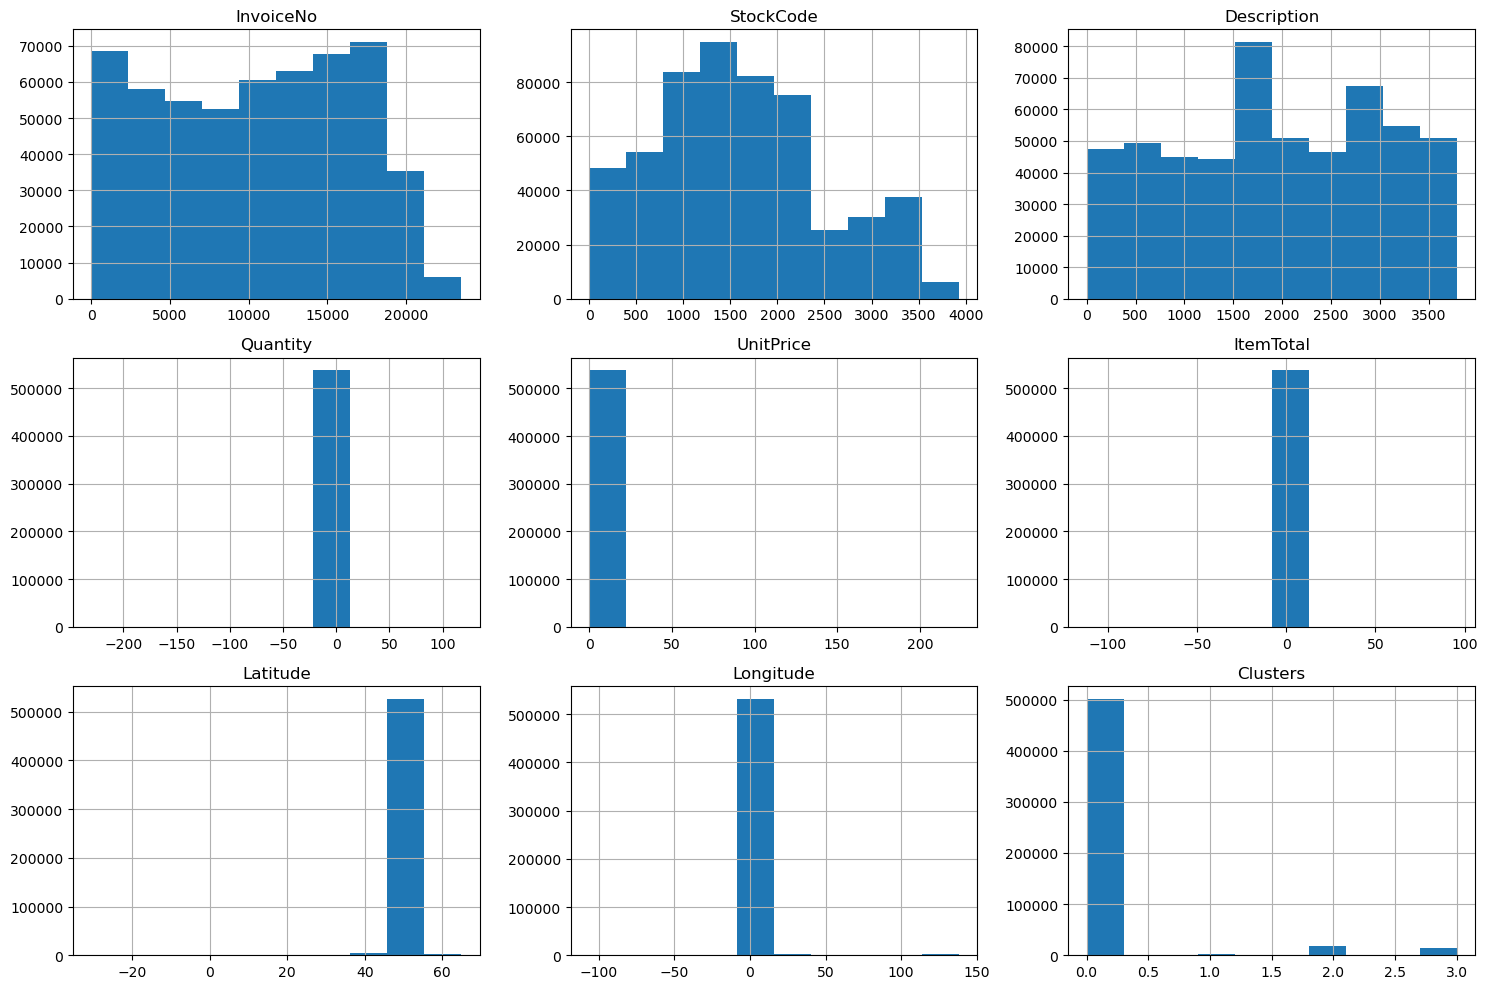

In [305]:
customer_clustered_copy.hist(figsize=(15,10))
plt.tight_layout().hist(figsize=(15,10))
plt.tight_layout()

In [ ]:
# # Model building
# from sklearn.ensemble import IsolationForest
# model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1), max_features=1.0)
# model.fit(customer_clustered_copy)

IsolationForest(contamination=0.1, n_estimators=50)

In [290]:
# # Adding 'scores' and 'anomaly' colums to df
# scores=model.decision_function(customer_clustered_copy)
# anomaly=model.predict(customer_clustered_copy)

# customer_clustered_copy['scores']=scores
# customer_clustered_copy['anomaly']=anomaly

# anomaly = customer_clustered_copy.loc[customer_clustered_copy['anomaly']==-1]
# anomaly_index = list(anomaly.index)
# print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 53752


In [291]:
#537520
customer_clustered_copy.shape

(537520, 11)

In [292]:
# # dropping outliers
# customer_clustered_copy = customer_clustered_copy.drop(anomaly_index, axis = 0).reset_index(drop=True)

AttributeError: 'NoneType' object has no attribute 'hist'

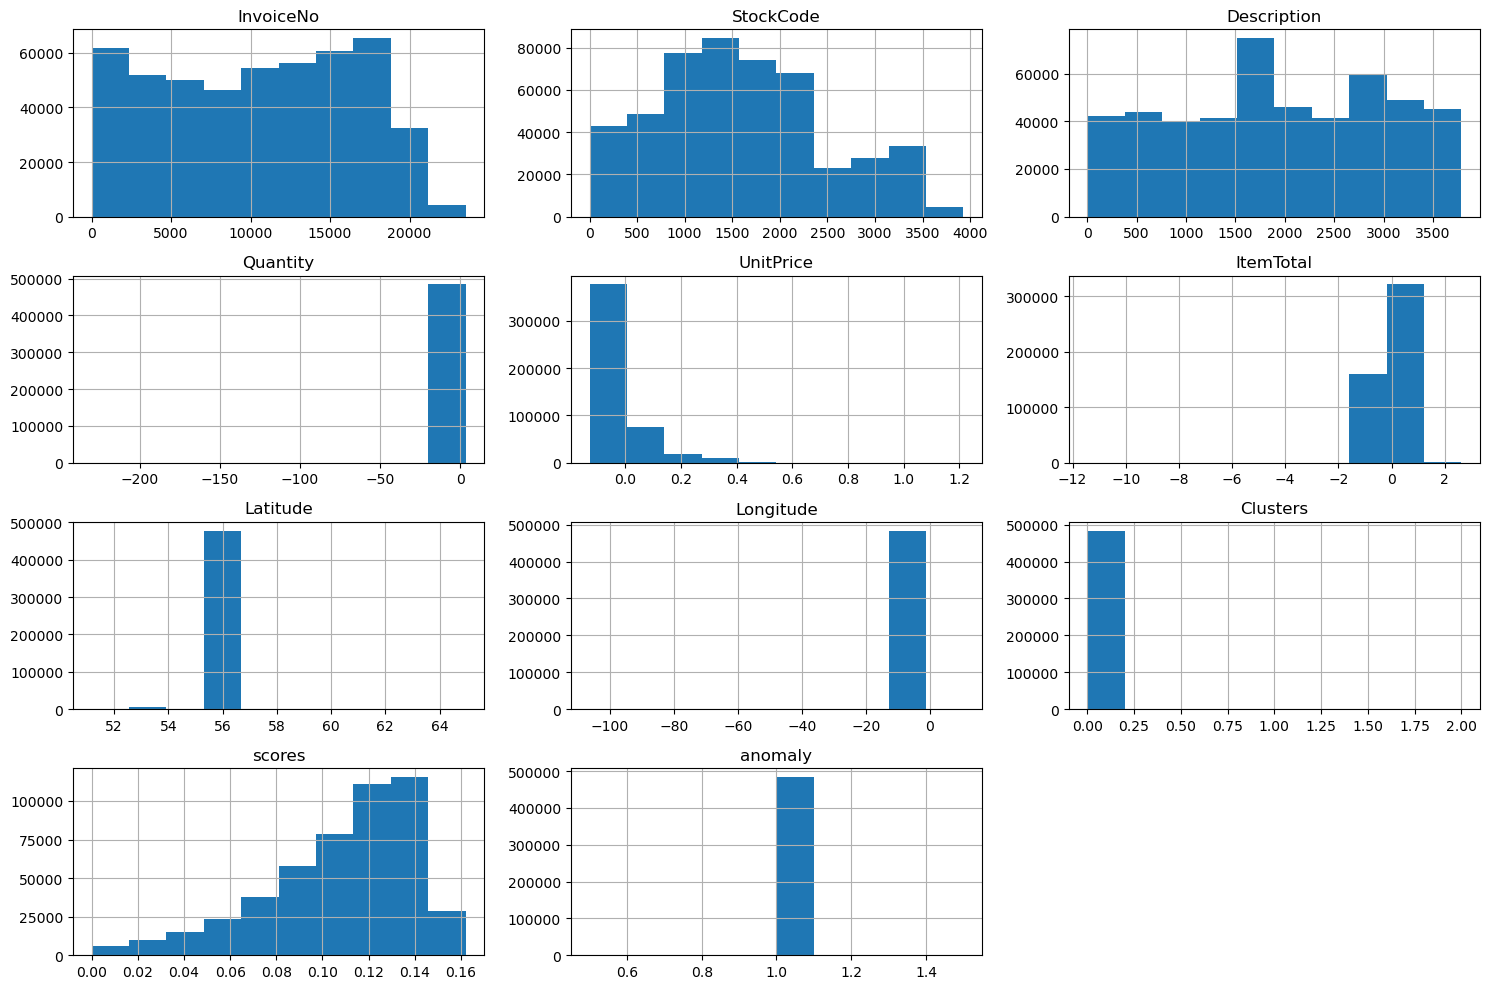

In [293]:
customer_clustered_copy.hist(figsize=(15,10))
plt.tight_layout().hist(figsize=(15,10))
plt.tight_layout()

In [309]:
customer_clustered_copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'ItemTotal', 'Latitude', 'Longitude', 'Clusters'],
      dtype='object')

In [310]:
def cap_outliers(customer_clustered_copy, column):
    Q1 = customer_clustered_copy[column].quantile(0.25)
    Q3 = customer_clustered_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    customer_clustered_copy[column] = customer_clustered_copy[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply the function to numerical columns
numerical_columns = ['Quantity', 'UnitPrice', 'ItemTotal']
for col in numerical_columns:
    cap_outliers(customer_clustered_copy, col)

In [311]:
customer_clustered.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'ItemTotal', 'Latitude', 'Longitude', 'Clusters'],
      dtype='object')

In [312]:
customer_clustered_copy[['Clusters']].value_counts()

Clusters
0           501481
2            18891
3            15021
1             2127
Name: count, dtype: int64

In [366]:
x=customer_clustered_copy[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'ItemTotal', 'Latitude', 'Longitude']]
y=customer_clustered_copy[['Clusters']]

In [367]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [368]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [369]:
y_pred = log.predict(X_test)

In [370]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))

Accuracy 93.51%


In [371]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100337      0      0      0]
 [     0      1    436      0]
 [  3561      0    181      0]
 [  2974      0      9      5]]


0.9350721833606191

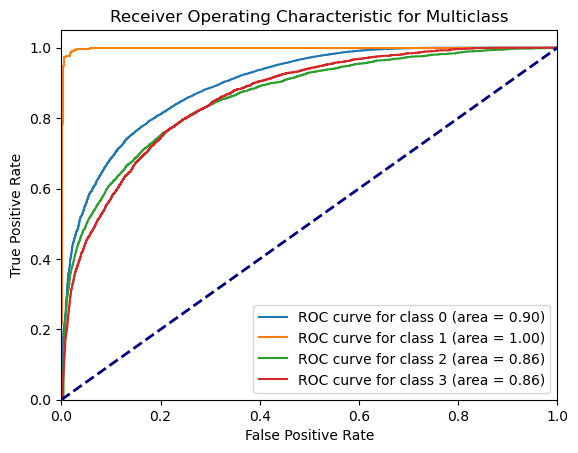

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3]) 
n_classes = y_test_bin.shape[1]

y_prob = log.predict_proba(X_test)  


plt.figure()

for i in range(n_classes):
    
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    
    
    plt.plot(fpr, tpr, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc='lower right')
plt.show()


In [373]:
from sklearn.ensemble import RandomForestClassifier
classifierr = RandomForestClassifier(n_estimators =1, criterion = 'gini', random_state = 42)
classifierr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=42)

In [374]:
y_predR = classifierr.predict(X_test)
cm = confusion_matrix(y_test, y_predR)
print(cm)
accuracy_score(y_test, y_predR)

[[100333      0      3      1]
 [     0    420     11      6]
 [     4      9   3717     12]
 [     2      3      8   2975]]


0.9994511832117875

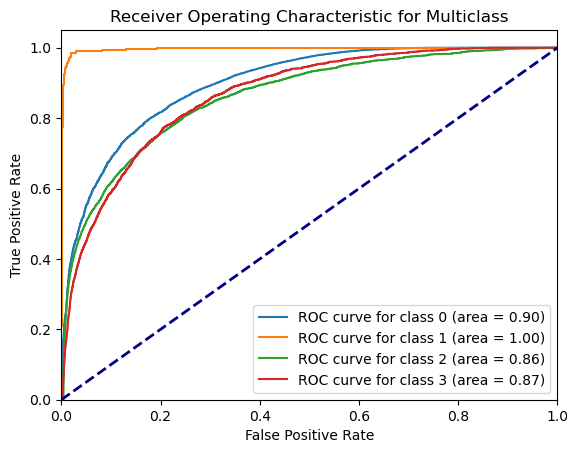

In [361]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains your true labels for 4 classes {0, 1, 2, 3}
# Binarize the output
y_test_bin = label_binarize(y_predR, classes=[0, 1, 2, 3])  # Adjust if your classes are different
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_prob = log.predict_proba(X_test)  # Assuming 'log' is your fitted model

# Initialize a figure for plotting
plt.figure()

for i in range(n_classes):
    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

# Plotting details
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc='lower right')
plt.show()